Ha: Work done so far: change all data types, drop some corrupted rows with at start_time and end_time
successfully fill in null values( with k means)
Next step: - engineering new feature, idle_time
           -visualising our data
We can also start working on the report with the part "Understanding data" afterwards.


In [1]:
# import all relevant libraries
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")

# also import these "new" libraries
# Note: you may have to download an add them to your environment (using e.g. 'conda install -c conda-forge folium')
import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime  # for working with times objects
from datetime import timedelta  # for working with times objects
import math
import random

## Step 1: Import Data 

In [2]:
# load csv file and set the index column by 0
df = pd.read_csv("baywheels_2019", encoding="ISO-8859-1", index_col=0)
df.head(20)

/var/folders/nf/2xng7w014d1f2mbbxqsxbwg40000gn/T/ipykernel_25281/1972288972.py:2: DtypeWarning: Columns (3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("baywheels_2019", encoding="ISO-8859-1", index_col=0)


,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50.0,37.780526,-122.390288,453.0,37.777934,-122.396973,12424.0
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285.0,37.783521,-122.431158,74.0,37.776435,-122.426244,1718.0
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10.0,37.795393,-122.40477,399.0,37.802636,-122.436289,608.0
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106.0,37.763242,-122.430675,72.0,37.772406,-122.43565,551642.0
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80.0,37.775235,-122.397437,50.0,37.780526,-122.390288,1103.0
5,2019-04-17 19:39:05,2019-04-17 19:49:26,100.0,37.7671,-122.410662,74.0,37.776435,-122.426244,1473.0
6,2019-02-26 08:11:01,2019-02-26 08:22:58,67.0,37.776639,-122.395526,8.0,37.799953,-122.398525,4984.0
7,2019-02-02 09:23:15,2019-02-02 09:34:20,44.0,37.781074,-122.411738,55.0,37.777053,-122.429558,2666.0
8,2019-05-07 12:08:01,2019-05-07 12:12:00,9.0,37.798572,-122.400869,6.0,37.80477,-122.403234,1961.0
9,2019-09-04 21:58:19,2019-09-04 22:09:07,86.0,37.769305,-122.426826,39.0,37.778999,-122.436861,9717.0


In [3]:
# take a look at the data types and general information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507003 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   start_time         object
 1   end_time           object
 2   start_station_id   object
 3   start_station_lat  object
 4   start_station_lon  object
 5   end_station_id     object
 6   end_station_lat    object
 7   end_station_lon    object
 8   bike_id            object
dtypes: object(9)
memory usage: 191.3+ MB
None
       start_time end_time  start_station_id  start_station_lat  \
count     2507003  2507003         2426269.0       2.507003e+06   
unique    2304544  2303004             867.0       7.712800e+04   
top       Failure  Failure              58.0       3.777662e+01   
freq           10       10           34467.0       3.446700e+04   

        start_station_lon  end_station_id  end_station_lat  end_station_lon  \
count        2.507003e+06       2424101.0     2.507003e+06     2.507003e+06   
unique

We can see that the data types are not specified which makes it hard to work with. After inspecting the dataset, there are rows containing "Failure" so we want to remove all of these. 

In [4]:
# create a new data frame that containts all failure rows from dft
rent_failure = df["start_time"].str.contains("Failure")
data_failure = df[rent_failure]
data_failure

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
381556,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
485428,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
621119,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
713198,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1150787,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1558857,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1676023,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1697405,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
1999499,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure
2249494,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure,Failure


In [5]:
# remove all rows that match failure rows
df = df.drop(data_failure.index, axis=0)

## Step 2: Transform Data

Now we have to convert every feature to the correct data types in order to to make calculations and analysis.

In [6]:
df["bike_id"]= pd.to_numeric(df["bike_id"], errors='coerce')
df["bike_id"]= df["bike_id"].astype('Int64')
df["start_station_lat"]= pd.to_numeric(df["start_station_lat"], errors='coerce')
df["start_station_lon"]=pd.to_numeric(df["start_station_lon"], errors='coerce')
df['start_station_lat'] = df['start_station_lat'].round(6)
df['start_station_lon'] = df['start_station_lon'].round(6)
df["end_station_lat"]=pd.to_numeric(df["end_station_lat"], errors='coerce')
df["end_station_lon"]=pd.to_numeric(df["end_station_lon"], errors='coerce')
df["start_station_id"] =pd.to_numeric(df["start_station_id"], errors='coerce')
df["start_station_id"]= df["start_station_id"].astype("Int64")
df["end_station_id"] =pd.to_numeric(df["end_station_id"], errors='coerce')
df["end_station_id"]= df["end_station_id"].astype("Int64")

df["start_time"]= pd.to_datetime(df["start_time"],format ='%Y-%m-%d %H:%M:%S')
df["end_time"]= pd.to_datetime(df["end_time"],format ='%Y-%m-%d %H:%M:%S')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506993 entries, 0 to 2507002
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   start_time         datetime64[ns]
 1   end_time           datetime64[ns]
 2   start_station_id   Int64         
 3   start_station_lat  float64       
 4   start_station_lon  float64       
 5   end_station_id     Int64         
 6   end_station_lat    float64       
 7   end_station_lon    float64       
 8   bike_id            Int64         
dtypes: Int64(3), datetime64[ns](2), float64(4)
memory usage: 198.4 MB
None


In [7]:
# After transforming the data we check if there are any non-defined values.
df.isna().sum()

start_time               0
end_time                 0
start_station_id     80734
start_station_lat        0
start_station_lon        0
end_station_id       82902
end_station_lat          0
end_station_lon          0
bike_id                  1
dtype: int64

In [8]:
df[df["start_station_id"].isnull() | df["end_station_id"].isnull()]

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
17,2019-07-28 13:49:45,2019-07-28 14:17:33,<NA>,37.806791,-122.419491,<NA>,37.798469,-122.401155,928582
33,2019-12-12 17:49:31,2019-12-12 18:08:43,<NA>,37.334925,-121.892451,<NA>,37.336896,-121.876394,211150
35,2019-07-22 16:46:26,2019-07-22 17:17:12,<NA>,37.801673,-122.444816,<NA>,37.807854,-122.418555,183615
54,2019-07-17 08:49:28,2019-07-17 09:07:23,<NA>,37.856264,-122.285781,256,37.875112,-122.260553,392211
64,2019-07-24 11:56:17,2019-07-24 12:05:06,<NA>,37.804854,-122.269595,<NA>,37.798805,-122.260244,250740
...,...,...,...,...,...,...,...,...,...
2506932,2019-12-02 07:31:20,2019-12-02 08:36:24,<NA>,37.332835,-121.892882,<NA>,37.402764,-121.940023,419120
2506941,2019-12-04 04:57:36,2019-12-04 05:03:18,<NA>,37.310447,-121.895164,<NA>,37.311285,-121.884870,676328
2506972,2019-11-28 22:30:18,2019-11-28 22:35:15,<NA>,37.342053,-121.910386,<NA>,37.342588,-121.911388,211150
2506975,2019-07-22 13:18:37,2019-07-22 13:32:23,<NA>,37.803232,-122.400816,<NA>,37.791067,-122.400340,904759


## Step 3: Handle missing and incorrect values

Firstly, we noticed that there are entries which have invalid start or end time (not in 2019). Since the amount of it is less than 5%, we can remove these.

In [9]:
# drop some rows with start_time in 2013
df.drop(df[(df['start_time'].dt.year < 2018) | (df['start_time'].dt.year > 2020)].index, inplace=True)
df

,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id
0,2019-10-28 09:46:47,2019-10-28 09:51:05,50,37.780526,-122.390288,453,37.777934,-122.396973,12424
1,2019-08-10 19:31:02,2019-08-10 19:35:05,285,37.783521,-122.431158,74,37.776435,-122.426244,1718
2,2019-05-27 13:18:58,2019-05-27 13:46:37,10,37.795393,-122.404770,399,37.802636,-122.436289,608
3,2019-07-24 22:47:58,2019-07-24 22:52:48,106,37.763242,-122.430675,72,37.772406,-122.435650,551642
4,2019-04-28 17:26:22,2019-04-28 17:31:54,80,37.775235,-122.397437,50,37.780526,-122.390288,1103
...,...,...,...,...,...,...,...,...,...
2506998,2019-04-12 19:11:48,2019-04-12 19:17:34,109,37.763316,-122.421904,381,37.758238,-122.426094,6118
2506999,2019-07-16 19:02:32,2019-07-16 19:06:54,58,37.776619,-122.417385,5,37.783899,-122.408445,1479
2507000,2019-05-29 16:03:26,2019-05-29 16:09:25,23,37.791464,-122.391034,15,37.795392,-122.394203,1742
2507001,2019-08-19 08:32:17,2019-08-19 08:41:26,23,37.791464,-122.391034,364,37.772000,-122.389970,10107


Secondly, there are missing values in <b>start_station_id</b> and <b>end_station_id</b> column. We tried different approaches to handle these values:
- Using <b>k-means clustering algorithm</b> to assign an ID to the given longtitudes and latitudes.

- <b>Dropping</b> all rows with missing values.

The cost of performing the first method was higher than the latter and the amount of missing values take up less than 5%, so we decided to opt for the second approach.

In [10]:
df.drop(df[df['start_station_id'].isnull() | df['end_station_id'].isnull()].index, inplace = True)

array([[<Axes: title={'center': 'start_time'}>,
        <Axes: title={'center': 'end_time'}>,
        <Axes: title={'center': 'start_station_id'}>],
       [<Axes: title={'center': 'start_station_lat'}>,
        <Axes: title={'center': 'start_station_lon'}>,
        <Axes: title={'center': 'end_station_id'}>],
       [<Axes: title={'center': 'end_station_lat'}>,
        <Axes: title={'center': 'end_station_lon'}>,
        <Axes: title={'center': 'bike_id'}>]], dtype=object)

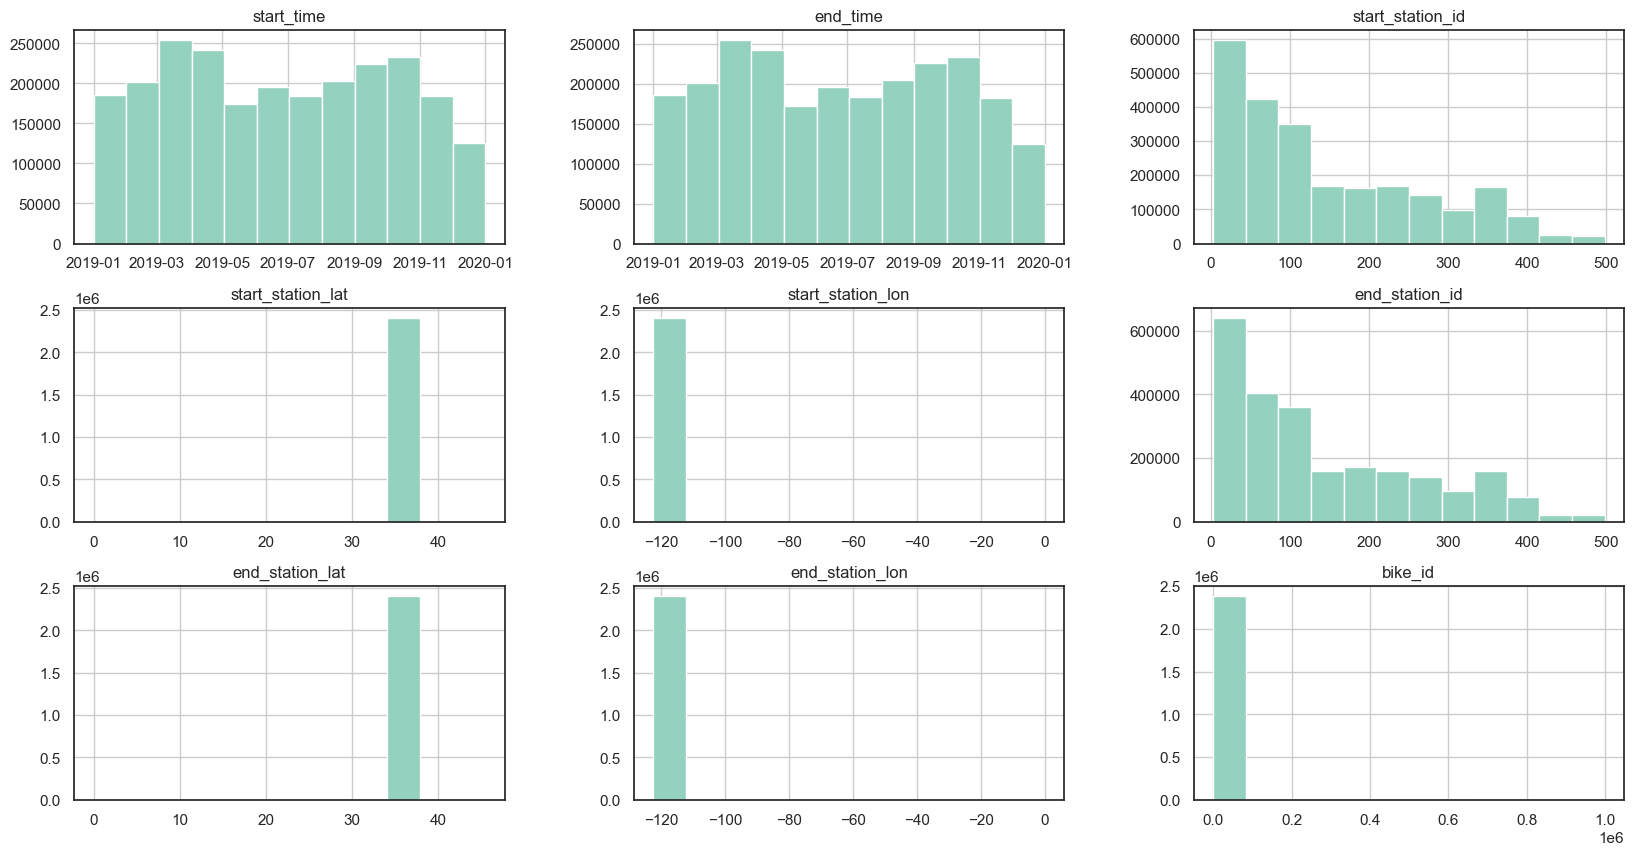

In [11]:
df.hist(bins = 12, figsize = (20, 10))

Something can be interpreted from the above graph:
the stations with the station_id under 150 are more occupied than the rest, maybe they are located within city center?




Now let's try to calculate idle time
2 approach: idle time group by bike_id, and idle time group by station_id

the first one is easier to implement 

Let's go with the first approach first


In [12]:
start_stations =df.loc[:,['start_time', 'start_station_id', 'bike_id']]
start_stations["rented"] = 0
start_stations.rename(columns = {"start_time": "timestamp", 'start_station_id': "station_id"}, inplace=True)
start_stations


,timestamp,station_id,bike_id,rented
0,2019-10-28 09:46:47,50,12424,0
1,2019-08-10 19:31:02,285,1718,0
2,2019-05-27 13:18:58,10,608,0
3,2019-07-24 22:47:58,106,551642,0
4,2019-04-28 17:26:22,80,1103,0
...,...,...,...,...
2506998,2019-04-12 19:11:48,109,6118,0
2506999,2019-07-16 19:02:32,58,1479,0
2507000,2019-05-29 16:03:26,23,1742,0
2507001,2019-08-19 08:32:17,23,10107,0


Now we want to try the second approach.

In [13]:
end_stations =df.loc[:,['end_time', 'end_station_id', 'bike_id']]
end_stations["rented"] = 1
end_stations.rename(columns={"end_time": "timestamp", 'end_station_id': "station_id"}, inplace=True)
end_stations

,timestamp,station_id,bike_id,rented
0,2019-10-28 09:51:05,453,12424,1
1,2019-08-10 19:35:05,74,1718,1
2,2019-05-27 13:46:37,399,608,1
3,2019-07-24 22:52:48,72,551642,1
4,2019-04-28 17:31:54,50,1103,1
...,...,...,...,...
2506998,2019-04-12 19:17:34,381,6118,1
2506999,2019-07-16 19:06:54,5,1479,1
2507000,2019-05-29 16:09:25,15,1742,1
2507001,2019-08-19 08:41:26,364,10107,1


In [66]:
df_merged = pd.concat([start_stations, end_stations], axis = 0)
df_merged.sort_values(by = ["station_id", "timestamp"])
df_merged['idle_time'] = pd.Timedelta(0)
df_merged

,timestamp,station_id,bike_id,rented,idle_time
0,2019-10-28 09:46:47,50,12424,0,0 days
1,2019-08-10 19:31:02,285,1718,0,0 days
2,2019-05-27 13:18:58,10,608,0,0 days
3,2019-07-24 22:47:58,106,551642,0,0 days
4,2019-04-28 17:26:22,80,1103,0,0 days
...,...,...,...,...,...
2506998,2019-04-12 19:17:34,381,6118,1,0 days
2506999,2019-07-16 19:06:54,5,1479,1,0 days
2507000,2019-05-29 16:09:25,15,1742,1,0 days
2507001,2019-08-19 08:41:26,364,10107,1,0 days


In [15]:
# test for station with ID 3
station_3 = df_merged[df_merged["station_id"] == 3]
station_3 = station_3.sort_values(by = "timestamp", ascending=True)
station_3 = station_3.reset_index()
station_3 = station_3.drop(['index'], axis = 1)
station_3

,timestamp,station_id,bike_id,rented,idle_time
0,2019-01-01 01:05:01,3,5426,1,0 days
1,2019-01-01 01:11:19,3,5481,0,0 days
2,2019-01-01 01:23:27,3,5216,0,0 days
3,2019-01-01 01:40:07,3,5426,0,0 days
4,2019-01-01 05:03:40,3,5191,0,0 days
...,...,...,...,...,...
71257,2019-12-31 21:03:43,3,9614,1,0 days
71258,2019-12-31 21:04:24,3,11437,1,0 days
71259,2019-12-31 22:03:58,3,2917,0,0 days
71260,2019-12-31 22:51:05,3,10219,0,0 days


In [31]:
#testing
station_3['prev_row'] = station_3.groupby("station_id")['timestamp'].shift(1)
station_3['idle_time'] = 0
station_3

,timestamp,station_id,bike_id,rented,idle_time,prev_row
0,2019-01-01 01:05:01,3,5426,1,0,NaT
1,2019-01-01 01:11:19,3,5481,0,0,2019-01-01 01:05:01
2,2019-01-01 01:23:27,3,5216,0,0,2019-01-01 01:11:19
3,2019-01-01 01:40:07,3,5426,0,0,2019-01-01 01:23:27
4,2019-01-01 05:03:40,3,5191,0,0,2019-01-01 01:40:07
...,...,...,...,...,...,...
71257,2019-12-31 21:03:43,3,9614,1,0,2019-12-31 20:59:03
71258,2019-12-31 21:04:24,3,11437,1,0,2019-12-31 21:03:43
71259,2019-12-31 22:03:58,3,2917,0,0,2019-12-31 21:04:24
71260,2019-12-31 22:51:05,3,10219,0,0,2019-12-31 22:03:58


We define a function that calculates idle time with the help of a nested loop inside the dataframe

In [67]:


def idle_cal(df):
    
    df = df.groupby('station_id')
    results = []  # List to store the modified groups
    for group_name, group_data in df:
        group_data.sort_values(by = 'timestamp', inplace = True)
        group_data.reset_index(drop=True, inplace=True)
    
        group_data['prev_row'] = group_data.groupby("station_id")['timestamp'].shift(1)
        for i, row in group_data.iterrows():
            if i != 0:
                if row['rented'] == 1:
                    idle_time = pd.Timedelta(0)
                    #print('idle at i ', i , ':', idle_time)
                    j = i - 1 
                    while j>=1 and group_data.at[j,'rented'] == 0:
                        idle_time = group_data.at[i,'timestamp'] -  group_data.at[j,'timestamp']
                        group_data.at[j,'idle_time'] = idle_time
                        #print('idle at j ', j , ':',  idle_time)
                        j -= 1
                    
        results.append(group_data)

    modified_df = (pd.concat(results, ignore_index=True))
    df = pd.DataFrame(modified_df)
    return df
    
                    
        

              


In [62]:
station_3 = idle_cal(station_3)
station_3.head(10)

In [68]:
df_merged = idle_cal(df_merged)
df_merged.head(10)

,timestamp,station_id,bike_id,rented,idle_time,prev_row
0,2019-01-01 01:05:01,3,5426,1,0 days 00:00:00,NaT
1,2019-01-01 01:11:19,3,5481,0,0 days 08:04:12,2019-01-01 01:05:01
2,2019-01-01 01:23:27,3,5216,0,0 days 07:52:04,2019-01-01 01:11:19
3,2019-01-01 01:40:07,3,5426,0,0 days 07:35:24,2019-01-01 01:23:27
4,2019-01-01 05:03:40,3,5191,0,0 days 04:11:51,2019-01-01 01:40:07
5,2019-01-01 05:04:54,3,5163,0,0 days 04:10:37,2019-01-01 05:03:40
6,2019-01-01 07:23:22,3,2609,0,0 days 01:52:09,2019-01-01 05:04:54
7,2019-01-01 09:15:31,3,2191,1,0 days 00:00:00,2019-01-01 07:23:22
8,2019-01-01 09:21:00,3,5063,1,0 days 00:00:00,2019-01-01 09:15:31
9,2019-01-01 09:30:24,3,5262,1,0 days 00:00:00,2019-01-01 09:21:00


In [69]:
df_merged.to_csv('idle_time_calculated')  

In [ ]:
notnull =df_merged[df_merged['idle_time']!=pd.Timedelta(0)]
print(notnull)

Empty DataFrame
Columns: [timestamp, station_id, bike_id, rented, idle_time]
Index: []


In [ ]:

# Calculate idle time by subtracting the start time of entry (i+1) from the end time of entry (i)
bikeRen.sort_values(by='start_time',inplace= True)

bikeRen['bike_idle_time'] = bikeRen['start_time'] - bikeRen.groupby('bike_id')['end_time'].shift(1)


bikeRen.head(10)
bikeRen.sort_values(by='bike_id',inplace= False)


,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,bike_idle_time
5,1153682,2019-11-28 15:02:41,2019-11-28 15:08:10,408,37.718027,-122.387862,408,37.718027,-122.387862,4,0 days 00:00:45
6,2482847,2019-11-28 14:59:39,2019-11-28 15:01:56,408,37.718027,-122.387862,408,37.718027,-122.387862,4,NaT
212,754154,2019-04-19 10:32:07,2019-04-19 10:39:13,21,37.789625,-122.400811,36,37.783830,-122.398870,11,0 days 00:56:29
18,1630246,2019-01-29 19:08:44,2019-01-29 19:30:58,350,37.771431,-122.405787,355,37.755367,-122.388795,11,0 days 10:16:50
177,1142636,2019-03-10 18:27:14,2019-03-10 18:30:29,115,37.765026,-122.398773,114,37.764478,-122.402570,11,0 days 00:06:22
...,...,...,...,...,...,...,...,...,...,...,...
2506973,117713,2019-12-03 15:15:09,2019-12-03 15:18:39,423,37.775696,-122.392793,344,37.775760,-122.392793,999941,0 days 00:17:40
2506981,1465980,2019-12-19 16:50:20,2019-12-19 16:52:07,423,37.775904,-122.392551,344,37.775879,-122.392585,999941,8 days 01:20:21
2506980,17936,2019-12-03 14:38:15,2019-12-03 14:39:39,423,37.775811,-122.392612,344,37.775784,-122.392640,999941,0 days 00:04:46
2506976,1309502,2019-12-03 15:27:35,2019-12-03 15:30:01,423,37.775975,-122.392381,344,37.775914,-122.392392,999941,0 days 00:08:56


I dont know if its because the fill in was not accurate but sometime the end_station of the entry i doesnt match the start_station of the entry i+1

We kinda need it to match to calculate how long was a bike x was parked in station y until x get booked again.
well with it telepathing to another station it doesnt make much sense.
we could, however, argue that there might be missing entries inbetween.

In [ ]:
group_11 =bikeRen.groupby('bike_id').get_group(11)

group_11.sort_values(by='start_time')



,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,bike_idle_time
164,84754,2019-01-02 20:15:13,2019-01-02 20:40:58,155,37.840521,-122.293528,200,37.800214,-122.253810,11,0 days 00:00:00
181,63987,2019-01-03 06:18:35,2019-01-03 06:24:06,200,37.800214,-122.253810,196,37.808894,-122.256460,11,0 days 09:37:37
185,576118,2019-01-03 08:02:38,2019-01-03 08:08:34,196,37.808894,-122.256460,182,37.809013,-122.268247,11,0 days 01:38:32
58,2464498,2019-01-07 09:38:17,2019-01-07 09:42:31,315,37.834174,-122.272968,176,37.828410,-122.266315,11,4 days 01:29:43
65,316278,2019-01-08 09:12:54,2019-01-08 09:34:12,189,37.839649,-122.271756,239,37.868813,-122.258764,11,0 days 23:30:23
...,...,...,...,...,...,...,...,...,...,...,...
61,923229,2019-04-24 17:47:13,2019-04-24 17:58:01,36,37.783830,-122.398870,89,37.769218,-122.407646,11,0 days 00:47:46
139,2307933,2019-04-24 18:36:47,2019-04-24 18:45:03,89,37.769218,-122.407646,92,37.772301,-122.393028,11,0 days 00:38:46
96,2399193,2019-04-25 07:51:20,2019-04-25 08:04:21,92,37.772301,-122.393028,22,37.789756,-122.394643,11,0 days 13:06:17
174,1837119,2019-04-25 08:20:15,2019-04-25 08:36:37,22,37.789756,-122.394643,90,37.771058,-122.402717,11,0 days 00:15:54


In [ ]:
bikeRen.isna().sum()

Unnamed: 0               0
start_time               0
end_time                 0
start_station_id         0
start_station_lat        0
start_station_lon        0
end_station_id           0
end_station_lat          0
end_station_lon          0
bike_id                  0
bike_idle_time       11069
dtype: int64

In [ ]:
bikeRen[bikeRen["bike_idle_time"].isnull()].sort_values(by='bike_id')

,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,bike_idle_time
6,2482847,2019-11-28 14:59:39,2019-11-28 15:01:56,408,37.718027,-122.387862,408,37.718027,-122.387862,4,NaT
164,84754,2019-01-02 20:15:13,2019-01-02 20:40:58,155,37.840521,-122.293528,200,37.800214,-122.253810,11,NaT
358,2216522,2019-01-08 08:11:34,2019-01-08 08:16:29,158,37.833279,-122.263490,176,37.828410,-122.266315,12,NaT
1337,409483,2019-01-02 17:59:08,2019-01-02 18:05:50,163,37.797320,-122.265320,200,37.800214,-122.253810,13,NaT
1755,752761,2019-01-26 23:00:22,2019-01-26 23:03:18,240,37.866043,-122.258804,266,37.862464,-122.264791,14,NaT
...,...,...,...,...,...,...,...,...,...,...,...
2506884,148344,2019-11-22 10:11:48,2019-11-22 15:41:47,397,37.765891,-122.395667,164,37.799111,-122.457995,998086,NaT
2506903,1989345,2019-07-23 20:39:19,2019-07-23 20:43:33,93,37.770407,-122.391198,345,37.766483,-122.398279,998430,NaT
2506948,1648125,2019-07-11 16:46:20,2019-07-11 16:49:16,425,37.774553,-122.414245,425,37.774589,-122.414209,999422,NaT
2506970,264914,2019-11-06 14:15:22,2019-11-06 14:16:37,175,37.774500,-122.414023,237,37.774578,-122.413950,999937,NaT


I suppose the rows with NaT are the earliest entry of every bike, i.e they dont have any idle time. So I'll fill them with 0 for now

In [ ]:
bikeRen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2506978 entries, 1440582 to 2392415
Data columns (total 11 columns):
 #   Column             Dtype          
---  ------             -----          
 0   Unnamed: 0         int64          
 1   start_time         datetime64[ns] 
 2   end_time           datetime64[ns] 
 3   start_station_id   int64          
 4   start_station_lat  float64        
 5   start_station_lon  float64        
 6   end_station_id     int64          
 7   end_station_lat    float64        
 8   end_station_lon    float64        
 9   bike_id            int64          
 10  bike_idle_time     timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(4), timedelta64[ns](1)
memory usage: 229.5 MB


In [ ]:
bikeRen['bike_idle_time']= bikeRen['bike_idle_time'].fillna(pd.Timedelta(0))
bikeRen.sort_values(by="bike_id",inplace=True)
bikeRen

,Unnamed: 0,start_time,end_time,start_station_id,start_station_lat,start_station_lon,end_station_id,end_station_lat,end_station_lon,bike_id,bike_idle_time
5,1153682,2019-11-28 15:02:41,2019-11-28 15:08:10,408,37.718027,-122.387862,408,37.718027,-122.387862,4,0 days 00:00:45
6,2482847,2019-11-28 14:59:39,2019-11-28 15:01:56,408,37.718027,-122.387862,408,37.718027,-122.387862,4,0 days 00:00:00
212,754154,2019-04-19 10:32:07,2019-04-19 10:39:13,21,37.789625,-122.400811,36,37.783830,-122.398870,11,0 days 00:56:29
18,1630246,2019-01-29 19:08:44,2019-01-29 19:30:58,350,37.771431,-122.405787,355,37.755367,-122.388795,11,0 days 10:16:50
177,1142636,2019-03-10 18:27:14,2019-03-10 18:30:29,115,37.765026,-122.398773,114,37.764478,-122.402570,11,0 days 00:06:22
...,...,...,...,...,...,...,...,...,...,...,...
2506973,117713,2019-12-03 15:15:09,2019-12-03 15:18:39,423,37.775696,-122.392793,344,37.775760,-122.392793,999941,0 days 00:17:40
2506981,1465980,2019-12-19 16:50:20,2019-12-19 16:52:07,423,37.775904,-122.392551,344,37.775879,-122.392585,999941,8 days 01:20:21
2506980,17936,2019-12-03 14:38:15,2019-12-03 14:39:39,423,37.775811,-122.392612,344,37.775784,-122.392640,999941,0 days 00:04:46
2506976,1309502,2019-12-03 15:27:35,2019-12-03 15:30:01,423,37.775975,-122.392381,344,37.775914,-122.392392,999941,0 days 00:08:56


Now with the second approach its harder to extract the station_id to group, because each row has 2 station_id(start/end). 
My idea is use 2 group by(with start station and end station ), add 2 column each: coming and leaving. At start_station, fill leaving with True and coming with false and vice versa. Then merge 2 group together.sort the group by time

## Step 3b: Working with Weather Data

First approaches:

In [23]:
# import the weather data
wd = pd.read_csv("SanFrancisco", encoding="ISO-8859-1", index_col=0)
# show first 20 rows
wd.head(20)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
city,,,,,,,,
San Francisco,2015-01-01 08:56:00,7.0,33.0,Fair,1018.26,6.0,0.0,7.0
San Francisco,2015-01-01 09:56:00,4.0,33.0,Fair,1018.60,6.0,0.0,4.0
San Francisco,2015-01-01 10:56:00,10.0,33.0,Fair,1018.60,28.0,0.0,10.0
San Francisco,2015-01-01 11:56:00,9.0,33.0,Fair,1018.60,19.0,0.0,7.0
San Francisco,2015-01-01 12:56:00,9.0,33.0,Fair,1018.60,20.0,0.0,6.0
San Francisco,2015-01-01 13:56:00,9.0,33.0,Fair,1018.94,15.0,0.0,6.0
San Francisco,2015-01-01 14:56:00,9.0,34.0,Fair,1019.62,28.0,0.0,5.0
San Francisco,2015-01-01 15:56:00,9.0,34.0,Fair,1019.96,22.0,0.0,6.0
San Francisco,2015-01-01 16:56:00,10.0,34.0,Fair,1020.63,19.0,0.0,10.0


In [24]:
# take a look at the data types and general information
print(wd.info())
print(wd.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 76631 entries, San Francisco to San Francisco
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                76631 non-null  object 
 1   temperature              76619 non-null  float64
 2   cloud_cover              76630 non-null  float64
 3   cloud_cover_description  76630 non-null  object 
 4   pressure                 76613 non-null  float64
 5   windspeed                76592 non-null  float64
 6   precipitation            76631 non-null  float64
 7   felt_temperature         76614 non-null  float64
dtypes: float64(6), object(2)
memory usage: 5.3+ MB
None
        temperature   cloud_cover      pressure     windspeed  precipitation  \
count  76619.000000  76630.000000  76613.000000  76592.000000   76631.000000   
mean      14.645388     29.215020   1016.244545     16.562722       0.062102   
std        4.030852      5.110355      4

In [26]:
# convert timestamp to datetime
wd['timestamp'] = pd.to_datetime(wd['timestamp'])

# extract the year from timestamp
wd['year'] = wd['timestamp'].dt.year

# count how many entries are for what year
value_counts = wd['year'].value_counts()

# show how many entries has every year, because only 2019 is important
print(value_counts)


2016    9741
2021    9656
2020    9611
2015    9567
2018    9547
2022    9518
2019    9501
2017    9479
2023      11
Name: year, dtype: int64


In [31]:
# only the data for the year 2019 is imoortant, so we drop all the other entries.
wd = wd[wd['timestamp'].dt.year == 2019]


In [32]:
# check first 20 entries to look is it was successfull
wd.head(20)

,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature,year
city,,,,,,,,,
San Francisco,2019-01-01 00:56:00,12.0,30.0,Partly Cloudy,1016.23,31.0,0.0,12.0,2019
San Francisco,2019-01-01 01:56:00,12.0,33.0,Fair / Windy,1016.57,35.0,0.0,12.0,2019
San Francisco,2019-01-01 02:56:00,12.0,33.0,Fair / Windy,1017.25,46.0,0.0,12.0,2019
San Francisco,2019-01-01 03:56:00,12.0,33.0,Fair / Windy,1017.25,44.0,0.0,12.0,2019
San Francisco,2019-01-01 04:56:00,11.0,33.0,Fair / Windy,1017.92,35.0,0.0,11.0,2019
San Francisco,2019-01-01 05:56:00,11.0,33.0,Fair / Windy,1017.59,52.0,0.0,11.0,2019
San Francisco,2019-01-01 06:56:00,10.0,33.0,Fair / Windy,1017.92,44.0,0.0,10.0,2019
San Francisco,2019-01-01 07:56:00,11.0,33.0,Fair,1018.60,30.0,0.0,11.0,2019
San Francisco,2019-01-01 08:56:00,11.0,33.0,Fair,1018.94,31.0,0.0,11.0,2019
